<a href="https://colab.research.google.com/github/djmary-k/Py16DS_HW02/blob/main/Hw2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 02 part 03, Module 02, Data Science. Частина третя: Аналіз датасет з Kaggle.com

Для виконання цієї частини домашнього завдання потрібно буде не тільки написати код, а й відповісти на супутні запитання. Там, де ви побачите виділений жирним шрифтом напис відповідь: потрібно буде вставити питання у файл і відповідь на нього.

* Прочитайте csv файл (використовуйте функцію read_csv)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data_books = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/bestsellers with categories.csv")

* Виведіть перші п'ять рядків (використовується функція head)

In [3]:
data_books.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


* Виведіть розміри датасету (використовуйте атрибут shape)

In [4]:
data_books.shape

(550, 7)

**Питання**
Про скільки книг зберігає дані датасет?

**Відповідь:** *550 книг в даному дата сеті*

* атрибут датафрейму: columns (можна просто присвоїти список нових імен цьому атрибуту)

In [5]:
data_books.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
data_books.head()

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


## Первинне дослідження даних

* Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)

In [6]:
data_books_na = pd.isnull(data_books).sum()
data_books_na

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

**Питання**
Чи є в якихось змінних пропуски? (Так / ні)

**Відповідь:** Ні

* Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)

In [7]:
pd.unique(data_books['genre'])

array(['Non Fiction', 'Fiction'], dtype=object)

**Питання**
Які є унікальні жанри?

**Відповідь:** Non Fiction, Fiction

* Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')

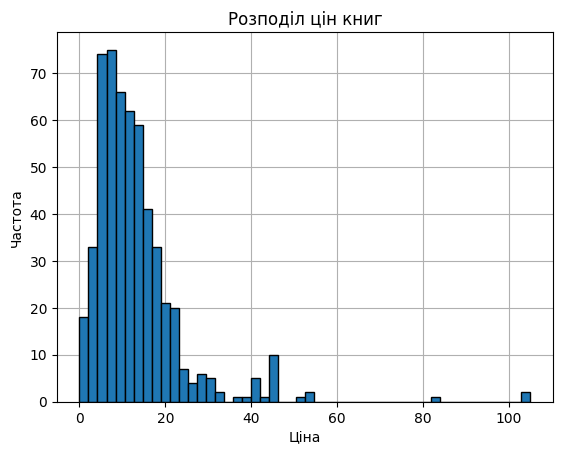

In [8]:
plt.hist(data_books['price'], bins=50, edgecolor='black')
plt.title('Розподіл цін книг')
plt.xlabel('Ціна')
plt.ylabel('Частота')
plt.grid()
plt.gca().set_axisbelow(True)
plt.show()

* Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)

**Питання**
Максимальна ціна?

In [9]:
data_books['price'].max()

105

**Відповідь:** 105

**Питання**
Мінімальна ціна?

In [10]:
data_books['price'].min()

0

**Відповідь:** 0

**Питання**
Середня ціна?

In [11]:
data_books['price'].mean()

13.1

**Відповідь:** 13.1

**Питання**
Медіанна ціни?

In [12]:
data_books['price'].median()

11.0

**Відповідь:** 11

## Пошук та сортування даних

* **Питання:**
Який рейтинг у датасеті найвищий?

In [13]:
data_books['user_rating'].max()

4.9

**Відповідь:** 4.9

* **Питання:** Скільки книг мають такий рейтинг?

In [14]:
grouped_user_rating = data_books.groupby(['user_rating'])
amount_books_by_rating = grouped_user_rating['name'].count()
print(amount_books_by_rating[4.9])

52


**Відповідь:** 52

* **Питання:** Яка книга має найбільше відгуків?  

In [15]:
data_reviews_and_names = data_books.loc[:, ['reviews', 'name']]
data_reviews_and_names.agg(['max'])

,reviews,name
max,87841,You Are a Badass: How to Stop Doubting Your Gr...


**Відповідь:** You Are a Badass: How to Stop Doubting Your Greatness and Start Living an Awesome Life

* **Питання:** З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)?

In [16]:
data_grouped_year = data_books.loc[ : , ['year', 'price', 'name']].groupby('year')
data_books_2015 = data_grouped_year.get_group(2015)
data_books_2015[data_books_2015['price'] == data_books_2015['price'].max()]['name'].values[0]

'Publication Manual of the American Psychological Association, 6th Edition'

In [17]:
# chat GPT
# data_set_2015 = data_books[data_books['year'] == 2015]
# data_set_2015.loc[data_set_2015['price'].idxmax()]

**Відповідь:** Publication Manual of the American Psychological Association, 6th Edition

* **Питання:** Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)?

In [18]:
data_set_2010 = data_books[(data_books['year'] == 2010) & (data_books['genre'] == 'Fiction')]
data_set_2010.shape[0]

20

**Відповідь:** 20

* **Питання:** Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)?

In [19]:
data_set_2010_2011 = data_books[((data_books['year'] == 2010) | (data_books['year'] == 2011)) & (data_books['user_rating'] == 4.9)]
data_set_2010_2011.groupby('year').count()

,name,author,user_rating,reviews,price,genre
year,,,,,,
2011,1,1,1,1,1,1


In [20]:
# data_books[(data_books['year'].isin([2010, 2011])) & (data_books['user_rating'] == 4.9)]

**Відповідь:** у 2011р. - одна книга, у 2010 - нуль книг.

* Давайте відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values).

In [21]:
data_set_2015_price_less_8 = data_books[(data_books['year'] == 2015) & (data_books['price'] < 8)].sort_values(by=['price'], ascending=True)
data_set_2015_price_less_8

,name,author,user_rating,reviews,price,year,genre
507,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2015,Fiction
210,Laugh-Out-Loud Jokes for Kids,Rob Elliott,4.6,6990,4,2015,Non Fiction
206,Knock-Knock Jokes for Kids,Rob Elliott,4.5,3673,4,2015,Non Fiction
111,First 100 Words,Roger Priddy,4.7,17323,4,2015,Non Fiction
123,Giraffes Can't Dance,Giles Andreae,4.8,14038,4,2015,Fiction
54,Creative Haven Creative Cats Coloring Book (Ad...,Marjorie Sarnat,4.8,4022,4,2015,Non Fiction
63,Dear Zoo: A Lift-the-Flap Book,Rod Campbell,4.8,10922,5,2015,Fiction
89,Dover Creative Haven Art Nouveau Animal Design...,Marty Noble,4.6,2134,5,2015,Non Fiction
478,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2015,Fiction
201,Killing Reagan: The Violent Assault That Chang...,Bill O'Reilly,4.6,5235,5,2015,Non Fiction


* **Питання:** Яка книга остання у відсортованому списку?

In [22]:
data_set_2015_price_less_8.tail(1)

,name,author,user_rating,reviews,price,year,genre
253,Old School (Diary of a Wimpy Kid #10),Jeff Kinney,4.8,6169,7,2015,Fiction


**Відповідь:** Old School (Diary of a Wimpy Kid #10)	Jeff Kinney

## Агрегування даних та з'єднання таблиць

Для початку давайте подивимося на максимальну та мінімальну ціни для кожного з жанрів (використовуйте функції groupby та agg, для підрахунку мінімальних та максимальних значень використовуйте max та min). Не беріть усі стовпці, виберіть тільки потрібні вам

In [23]:
data_grouped_genre_min_max = data_books.groupby('genre').agg(['min', 'max'])
min_max_price_by_genre = data_grouped_genre_min_max.loc[:]['price']
min_max_price_by_genre

,min,max
genre,,
Fiction,0,82
Non Fiction,0,105


* **Питання:** Максимальна ціна для жанру Fiction?

In [24]:
min_max_price_by_genre.at['Fiction', 'max']

82

**Відповідь:** 82

* **Питання:** Мінімальна ціна для жанру Fiction

In [25]:
min_max_price_by_genre.at['Fiction', 'min']

0

**Відповідь:** 0

* **Питання:** Максимальна ціна для жанру Non Fiction

In [26]:
min_max_price_by_genre.at['Non Fiction', 'max']

105

**Відповідь:** 105

* **Питання:** Мінімальна ціна для жанру Non Fiction

In [27]:
min_max_price_by_genre.at['Non Fiction', 'min']

0

**Відповідь:** 0

Тепер створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів (використовуйте функції groupby та agg, для підрахунку кількості використовуйте count). Не беріть усі стовпці, виберете тільки потрібні

In [28]:
data_author_amount_books = data_books.loc[ : ,('name', 'author')].groupby('author').count()
data_author_amount_books

,name
author,
Abraham Verghese,2
Adam Gasiewski,1
Adam Mansbach,1
Adir Levy,1
Admiral William H. McRaven,1
...,...
Walter Isaacson,3
William Davis,2
William P. Young,2


* **Питання:** Якої розмірності вийшла таблиця?

In [29]:
data_author_amount_books.shape

(248, 1)

**Відповідь:** 248x1

* **Питання:** Який автор має найбільше книг?

In [30]:
data_author_amount_books.idxmax()

name    Jeff Kinney
dtype: object

**Відповідь:**  Jeff Kinney

* **Питання:** Скільки книг цього автора?

In [31]:
data_author_amount_books.max()

name    12
dtype: int64

**Відповідь:** 12

Тепер створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора (використовуйте функції groupby та agg, для підрахунку середнього значення використовуйте mean). Не беріть усі стовпці, виберете тільки потрібні

In [32]:
data_author_rating_mean = data_books.loc[ : , ['author', 'user_rating']].groupby('author').mean()
data_author_rating_mean

,user_rating
author,
Abraham Verghese,4.600000
Adam Gasiewski,4.400000
Adam Mansbach,4.800000
Adir Levy,4.800000
Admiral William H. McRaven,4.700000
...,...
Walter Isaacson,4.566667
William Davis,4.400000
William P. Young,4.600000


* **Питання:** У якого автора середній рейтинг мінімальний?

In [33]:
data_author_rating_mean.idxmin()

user_rating    Donna Tartt
dtype: object

**Відповідь:** Donna Tartt

* **Питання:** Який у цього автора середній рейтинг?

In [34]:
data_author_rating_mean.min()

user_rating    3.9
dtype: float64

**Відповідь:** 3.9

З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг (Використовуйте функцію concat з параметром axis=1). Збережіть результат у змінну

In [35]:
data_author = pd.concat([data_author_amount_books, data_author_rating_mean], axis=1)
data_author

,name,user_rating
author,,
Abraham Verghese,2,4.600000
Adam Gasiewski,1,4.400000
Adam Mansbach,1,4.800000
Adir Levy,1,4.800000
Admiral William H. McRaven,1,4.700000
...,...,...
Walter Isaacson,3,4.566667
William Davis,2,4.400000
William P. Young,2,4.600000


Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом (використовуйте функцію sort_values)

In [36]:
data_author = data_author.sort_values(by=['name', 'user_rating'])

* **Питання:** Який автор перший у списку?

In [37]:
data_author.head(1)

,name,user_rating
author,,
Muriel Barbery,1,4.0


**Відповідь:** Muriel Barbery

## Візуалізація

* додайте від 3 до 5 графіків функцій різного типу на ваш вибір

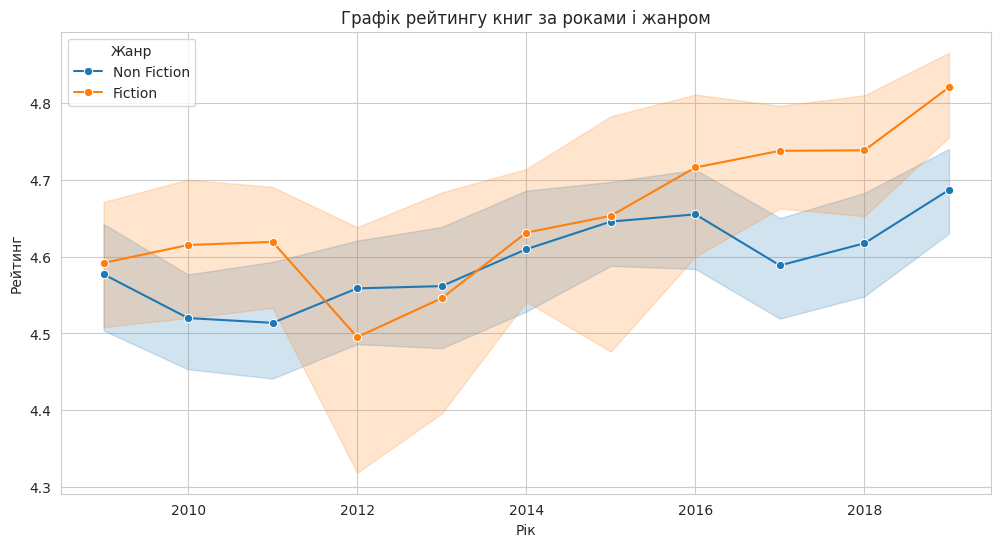

In [55]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=data_books, x='year', y='user_rating', hue='genre', marker='o')
plt.title('Графік рейтингу книг за роками і жанром')
plt.xlabel('Рік')
plt.ylabel('Рейтинг')
plt.legend(title='Жанр')
plt.grid(True)
plt.show()

* Графік плотності: Порівняння розподілу цін на книги за роками

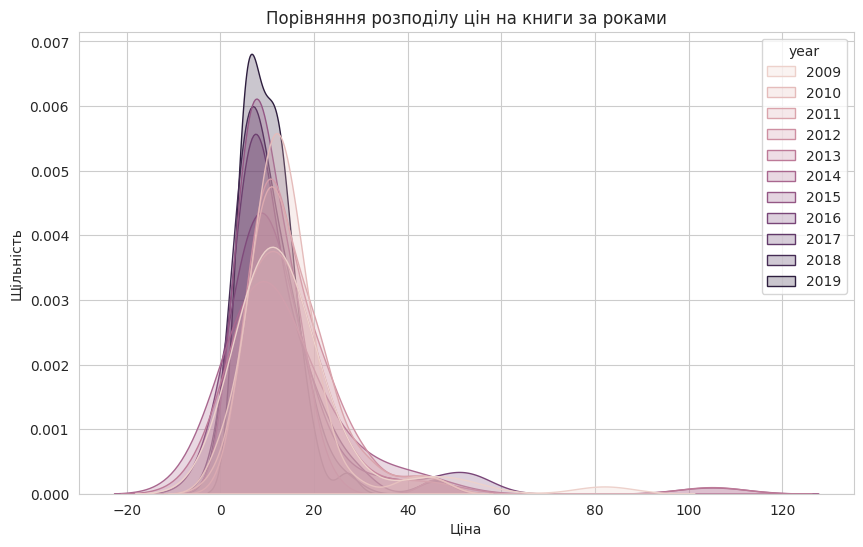

In [42]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data_books, x='price', hue='year', fill=True)
plt.title('Порівняння розподілу цін на книги за роками')
plt.xlabel('Ціна')
plt.ylabel('Щільність')
plt.show()

* Діаграма розсіювання: Залежність рейтингу книги від числа відгуків

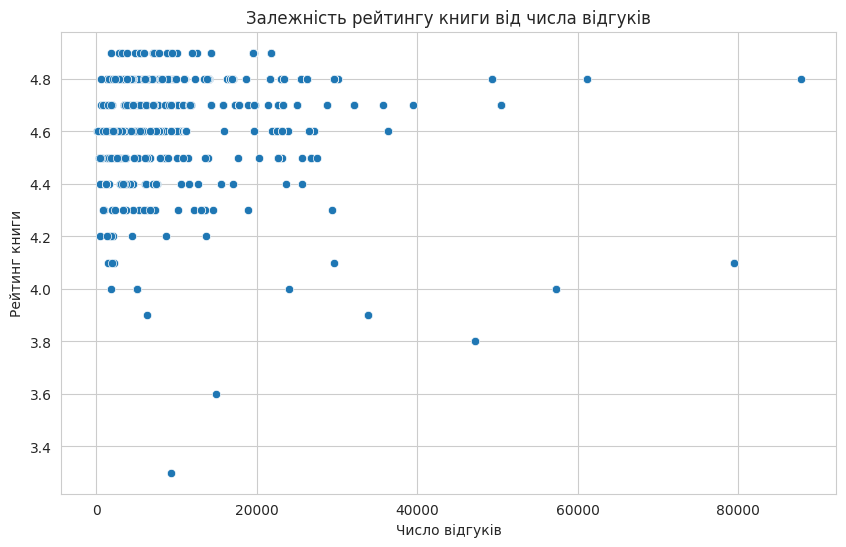

In [43]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_books, x='reviews', y='user_rating')
plt.title('Залежність рейтингу книги від числа відгуків')
plt.xlabel('Число відгуків')
plt.ylabel('Рейтинг книги')
plt.show()

* Box plot: Порівняння цін на книги між Fiction та Non Fiction

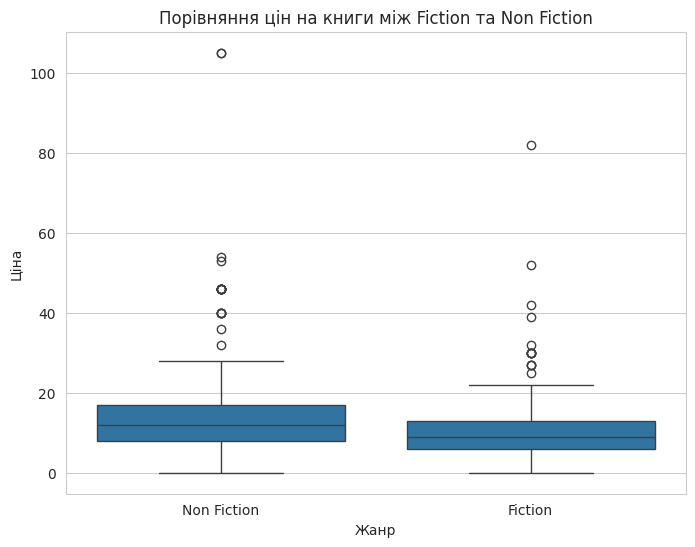

In [45]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data_books, x='genre', y='price')
plt.title('Порівняння цін на книги між Fiction та Non Fiction')
plt.xlabel('Жанр')
plt.ylabel('Ціна')
plt.show()